<a href="https://colab.research.google.com/github/Sayyaf-nk7/PortfoiloProject/blob/main/Pandas_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Necessary Libraries**

In [ ]:
import pandas as pd
import os

**Merging 12 months of sales data into a single file**

In [ ]:
#from google.colab import files
#uploaded = files.upload()
#df=pd.read_csv('Sales_April_2019.csv')

# list all files in the directory
#files = [file for file in os.listdir('./Sales_Data')]
#all_months_data = pd.DataFrame()
#for file in files:
#   df=pd.read_csv('/Sales_Data/'+file)
#   all_month_data = pd.concat([all_month_data],df)
# all_month_data.to_csv('all_data_csv',index= False)


.config
Sales_April_2019.csv
sample_data


Method to merge files in colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Sales Analysis 


/content/gdrive/MyDrive/Sales Analysis


In [ ]:
import pandas as pd

# Read all CSV files in the directory into a list of DataFrames
df = [pd.read_csv(file) for file in os.listdir() if file.endswith('.csv')]

# Concatenate the DataFrames into a single DataFrame
merged_data = pd.concat(df)

# Write the merged data to a new CSV file
merged_data.to_csv('merged_data.csv', index=False)
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


**Clean up the data**

Drop rows of NaN

In [ ]:
nan_df = merged_data[merged_data.isnull().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_data = merged_data.dropna(how='all')
merged_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
1307945,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
1307946,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
1307947,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
1307948,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


Find 'Or' and delete it

In [ ]:
#temp_df = merged_data[merged_data['Order Date'].str[0:2] == 'Or']
#temp_df.head()
# we got our issie we are gonna drop all duplicates. Now we are giving not equal Or

merged_data = merged_data[merged_data['Order Date'].str[0:2] != 'Or']
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Convert columns to the correct type

In [ ]:
merged_data['Quantity Ordered'] = pd.to_numeric(merged_data['Quantity Ordered']) # make int
merged_data['Price Each'] = pd.to_numeric(merged_data['Price Each'])# make float
merged_data.head()

<ipython-input-8-992121367970>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Quantity Ordered'] = pd.to_numeric(merged_data['Quantity Ordered']) # make int
<ipython-input-8-992121367970>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Price Each'] = pd.to_numeric(merged_data['Price Each'])# make float


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Augument data with assitional columns

**task 2 : Add month Column**

In [ ]:
#The code snippet merged_data['Month'] = merged_data['Order Date'].str[0:2] is using 
# pandas string slicing to extract the first two characters of the 'Order Date' column 
# and create a new column called 'Month' in the 'merged_data' DataFrame.

merged_data['Month'] = merged_data['Order Date'].str[0:2]
merged_data['MOnth'] = merged_data['Month'].astype('int32')
merged_data.head()

<ipython-input-9-4d06deec99e0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Month'] = merged_data['Order Date'].str[0:2]
<ipython-input-9-4d06deec99e0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['MOnth'] = merged_data['Month'].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,MOnth
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,4


**task 3 : Adding sales column**

In [ ]:
merged_data['Sales'] = merged_data['Quantity Ordered'] * merged_data['Price Each']
merged_data.head()

<ipython-input-10-8fd9a85b0787>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Sales'] = merged_data['Quantity Ordered'] * merged_data['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,MOnth,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,4,11.99


**task 4 : Add a city column**

In [ ]:
# Let's use .apply()
def get_city(address):
  return address.split(',')[1]

# there will be many duplicates in cities. so we gonna add states as well
def get_state(address):
  return address.split(',')[2].split(' ')[1] # to get rid of codes

merged_data['City'] = merged_data['Purchase Address'].apply(lambda x : f"{get_city(x)}({get_state(x)})")

merged_data.head()

<ipython-input-11-1bcd6ca13cb9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['City'] = merged_data['Purchase Address'].apply(lambda x : f"{get_city(x)}({get_state(x)})")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,MOnth,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,4,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,4,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,4,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,4,11.99,Los Angeles(CA)


**what are the best month for sales? How much was earned that month?**

In [ ]:
results = merged_data.groupby('Month').sum()

<ipython-input-12-a69e62a77cb2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = merged_data.groupby('Month').sum()


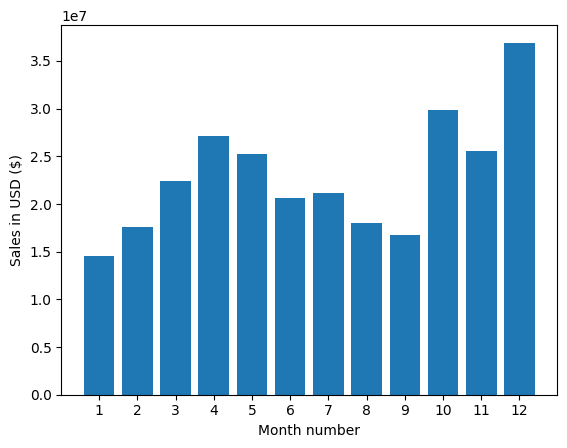

In [ ]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months , results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

**What city had the highest number of sales**

In [ ]:
results = merged_data.groupby('City').sum()
results

<ipython-input-14-14e31afc4cb7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = merged_data.groupby('City').sum()


,Quantity Ordered,Price Each,MOnth,Sales
City,,,,
Atlanta(GA),132816,22239265.60,838352,22363988.64
Austin(TX),89224,14478988.88,558632,14556654.00
Boston(MA),180224,29099278.16,1128896,29293136.08
Dallas(TX),133840,22021022.56,836960,22143803.20
Los Angeles(CA),266312,43371481.84,1666600,43620566.40
New York City(NY),223456,37082966.64,1405928,37314539.44
Portland(ME),22000,3577514.00,137152,3598066.16
Portland(OR),90424,14884465.76,564968,14965858.72
San Francisco(CA),401912,65691693.92,2524160,66097631.28


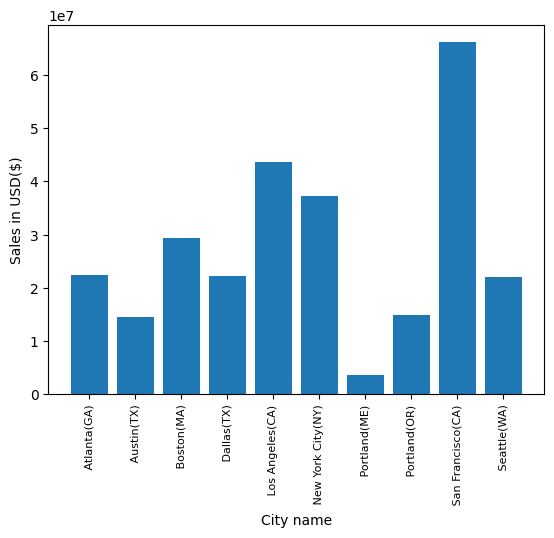

In [ ]:
import matplotlib.pyplot as  plt

cities = [city for city,df in merged_data.groupby('City')]

plt.bar(cities,results['Sales'])
plt.xticks(cities, rotation='vertical',size=8)
plt.ylabel('Sales in USD($)')
plt.xlabel('City name')
plt.show()

What time should we display advertisements to maxiize likehood of coustmers buying product?

In [ ]:
merged_data['Order Date'] = pd.to_datetime(merged_data['Order Date']) # changing data type

<ipython-input-16-2505daf13703>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Order Date'] = pd.to_datetime(merged_data['Order Date']) # changing data type


In [ ]:
merged_data['Hour'] = merged_data['Order Date'].dt.hour 
# This column is created by extracting the hour component from the 'Order Date' column using the .dt
merged_data['Minute'] = merged_data['Order Date'].dt.minute
merged_data.head()

<ipython-input-17-0ffa7a9b420c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Hour'] = merged_data['Order Date'].dt.hour
<ipython-input-17-0ffa7a9b420c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Minute'] = merged_data['Order Date'].dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,MOnth,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,4,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,4,99.99,Boston(MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,4,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,4,11.99,Los Angeles(CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,4,11.99,Los Angeles(CA),9,27


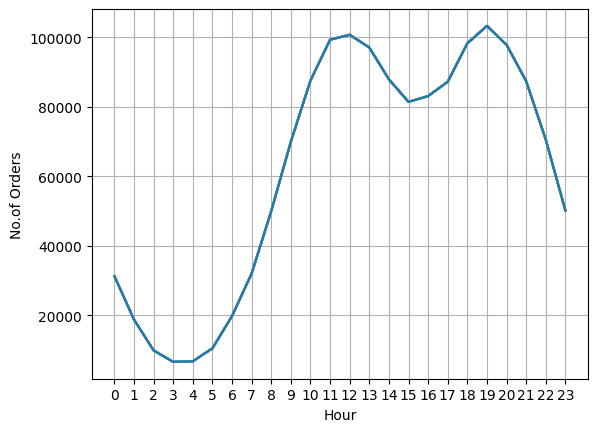

In [ ]:
hours = [hour for hour, df in merged_data.groupby('Hour')]
plt.plot(hours, merged_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('No.of Orders')
plt.grid()
plt.show()

What products are most often sold together?

In [ ]:
df = merged_data[merged_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

df=df[['Order ID','Grouped']].drop_duplicates()

df.head()

,Order ID,Grouped
0,176558,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
2,176559,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,"Wired Headphones,Wired Headphones,Wired Headph..."
6,176562,"USB-C Charging Cable,USB-C Charging Cable,USB-..."


In [ ]:
from itertools import combinations
from collections import Counter

count= Counter()
for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
  print(key,value)

('USB-C Charging Cable', 'USB-C Charging Cable') 616356
('Lightning Charging Cable', 'Lightning Charging Cable') 609880
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 581020
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 578396
('Wired Headphones', 'Wired Headphones') 530936
('Apple Airpods Headphones', 'Apple Airpods Headphones') 436908
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 374828
('27in FHD Monitor', '27in FHD Monitor') 210772
('iPhone', 'iPhone') 191704
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 174760


What product sold the most and why?

<ipython-input-30-84577e15f4d4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


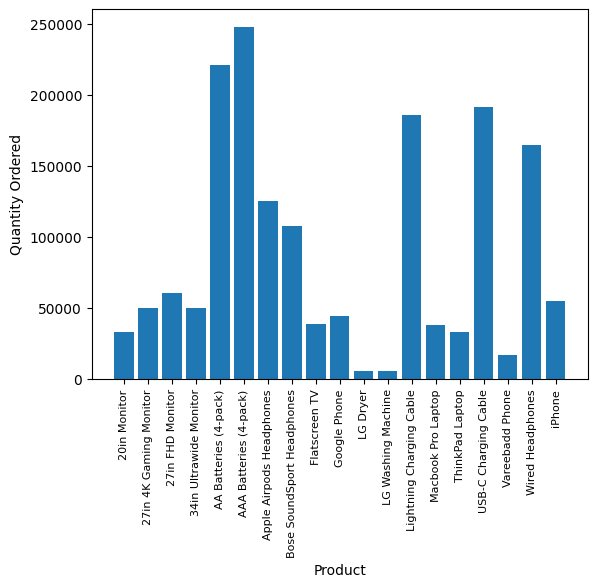

In [ ]:
product_group = merged_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products,rotation='vertical',size=8)
plt.show()

<ipython-input-35-4d8dd81ad435>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices= merged_data.groupby('Product').mean()["Price Each"]
<ipython-input-35-4d8dd81ad435>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical',size = 8)


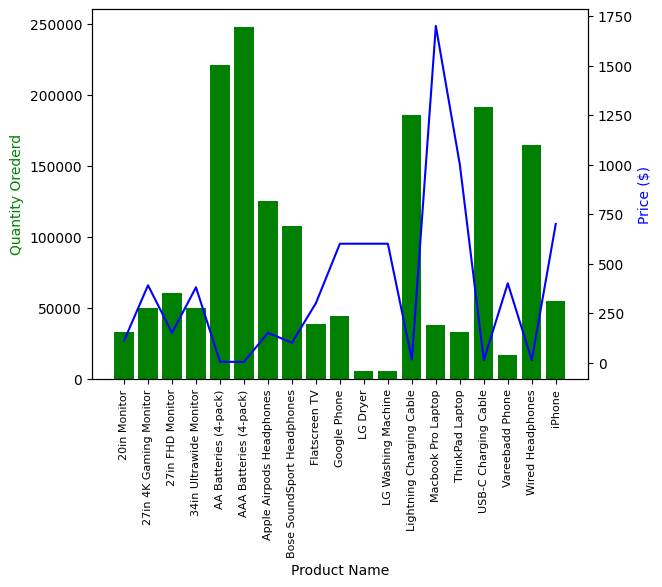

In [ ]:
prices= merged_data.groupby('Product').mean()["Price Each"]

#add a second y-axis to a Matplotlib plot, you can use the twinx() method. 
# Create a figure and an axis object
fig, ax1 = plt.subplots()

# Create a second y-axis that shares the same x-axis as ax1
ax2 = ax1.twinx()

# Plot the second data series on the secondary y-axis
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

# add label to x and y axis
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Orederd', color='g')
ax2.set_ylabel('Price ($)',color='b')
ax1.set_xticklabels(products, rotation='vertical',size = 8)

plt.show()